In [1]:
from nwb_utils import NWBUtils

# Example ephys session
ephys_path = "/root/capsule/data/" \
             "ecephys_776293_2025-02-14_15-19-17_sorted_2025-02-28_21-37-07/" \
             "nwb/" \
             "ecephys_776293_2025-02-14_15-19-17_experiment1_recording1.nwb"

# Example behavior/ophys session
ophys_path = "/root/capsule/data/" \
             "behavior_777403_2025-04-11_16-53-47_processed_2025-04-12_04-37-54/" \
             "nwb/" \
             "behavior_777403_2025-04-11_16-53-47.nwb"

# Read ephys
ephys_data = NWBUtils.read_ephys_nwb(nwb_full_path=ephys_path)
# ephys_data will be None on failure, or the NWBFile-like object on success.

# Read ophys/behavior
ophys_data = NWBUtils.read_ophys_nwb(nwb_full_path=ophys_path)
# ophys_data will likewise be None on failure, or the NWBFile-like object on success.


Successfully read ephys NWB from: /root/capsule/data/ecephys_776293_2025-02-14_15-19-17_sorted_2025-02-28_21-37-07/nwb/ecephys_776293_2025-02-14_15-19-17_experiment1_recording1.nwb


/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Successfully read ophys NWB from: /root/capsule/data/behavior_777403_2025-04-11_16-53-47_processed_2025-04-12_04-37-54/nwb/behavior_777403_2025-04-11_16-53-47.nwb


In [2]:
from nwb_utils import NWBUtils

ephys_data = NWBUtils.read_ephys_nwb(
    session_name="776293_2025-02-14_15-19-17"
)

ophys_data = NWBUtils.read_ophys_nwb(
    session_name="777403_2025-04-11_16-53-47"
)


Found ephys NWB: /root/capsule/data/ecephys_776293_2025-02-14_15-19-17_sorted_2025-02-28_21-37-07/nwb/ecephys_776293_2025-02-14_15-19-17_experiment1_recording1.nwb
Successfully read ephys NWB from: /root/capsule/data/ecephys_776293_2025-02-14_15-19-17_sorted_2025-02-28_21-37-07/nwb/ecephys_776293_2025-02-14_15-19-17_experiment1_recording1.nwb
Found ophys NWB: /root/capsule/data/behavior_777403_2025-04-11_16-53-47_processed_2025-04-12_04-37-54/nwb/behavior_777403_2025-04-11_16-53-47.nwb
Successfully read ophys NWB from: /root/capsule/data/behavior_777403_2025-04-11_16-53-47_processed_2025-04-12_04-37-54/nwb/behavior_777403_2025-04-11_16-53-47.nwb


In [2]:
from general_utils import find_ephys_sessions, find_behavior_sessions
from nwb_utils import NWBUtils

def main():
    data_root = '/root/capsule/data/'

    # 1. Find all ephys sessions
    all_ephys, ephys_by_animal, spike_sorted = find_ephys_sessions(data_root)
    print("All ephys sessions:", all_ephys)
    print("Spike-sorted sessions:", spike_sorted)

    # 2. Find all behavior sessions
    all_behav, behav_by_animal, processed_behav = find_behavior_sessions(data_root)
    print("All behavior sessions:", all_behav)
    print("Processed behavior sessions:", processed_behav)

    # 3. Read the first spike-sorted ephys session
    if spike_sorted:
        first_ephys = spike_sorted[0]
        print(f"\nLoading ephys session: {first_ephys}")
        ephys_data = NWBUtils.read_ephys_nwb(
            session_name=first_ephys,
            folder_path=data_root
        )
        # ephys_data is None on failure, or the NWBFile-like object on success

    # 4. Read the first processed behavior session
    if processed_behav:
        first_behav = processed_behav[0]
        print(f"\nLoading behavior session: {first_behav}")
        behav_data = NWBUtils.read_ophys_nwb(
            session_name=first_behav,
            folder_path=data_root
        )
        # behav_data is None on failure, or the NWBFile-like object on success

if __name__ == "__main__":
    main()


All ephys sessions: ['ecephys_706893_2024-05-28_15-15-38', 'ecephys_753124_2024-12-10_17-24-56_sorted_2024-12-13_09-48-25', 'ecephys_753125_2024-10-09_10-50-19_sorted_2024-11-09_20-03-58', 'ecephys_753125_2024-10-10_14-41-23_sorted_2024-11-09_20-18-36', 'ecephys_753125_2024-10-14_15-37-15_sorted_2024-11-09_20-07-38', 'ecephys_753125_2024-10-15_16-16-22_sorted_2024-11-09_19-57-50', 'ecephys_753126_2024-10-10_17-51-24_sorted_2025-02-21_13-56-40', 'ecephys_753126_2024-10-11_13-14-24_sorted_2024-11-09_19-18-21', 'ecephys_753126_2024-10-15_12-20-35_sorted_2024-11-09_19-47-57', 'ecephys_764769_2024-12-11_18-21-49_sorted_2024-12-13_10-04-48', 'ecephys_764769_2024-12-12_16-05-00_sorted_2024-12-13_10-34-23', 'ecephys_764769_2024-12-13_15-41-07_sorted_2024-12-17_18-00-23', 'ecephys_764787_2024-12-10_13-42-03_sorted_2025-01-24_15-52-45', 'ecephys_764787_2024-12-11_15-01-15_sorted_2025-02-21_17-11-57', 'ecephys_764787_2024-12-12_11-54-14_sorted_2024-12-13_10-39-18', 'ecephys_764787_2024-12-13_18-2

In [3]:
from behavior_utils import extract_event_timestamps
from nwb_utils import NWBUtils
behav_data = NWBUtils.read_ophys_nwb(session_name='behavior_762206_2025-01-17_16-20-02_processed_2025-01-18_07-17-12')
behav_data = NWBUtils.read_behavior_nwb(session_name='ecephys_753125_2024-10-14_15-37-15_sorted_2024-11-09_20-07-38')
extract_event_timestamps(behav_data,'left_lick')

Found ophys NWB: /root/capsule/data/behavior_762206_2025-01-17_16-20-02_processed_2025-01-18_07-17-12/nwb/behavior_762206_2025-01-17_16-20-02.nwb
Successfully read ophys NWB from: /root/capsule/data/behavior_762206_2025-01-17_16-20-02_processed_2025-01-18_07-17-12/nwb/behavior_762206_2025-01-17_16-20-02.nwb
Found behavior NWB: /root/capsule/data/behavior_nwb/753125_2024-10-14_15-37-15.nwb
Successfully read behavior NWB from: /root/capsule/data/behavior_nwb/753125_2024-10-14_15-37-15.nwb


[3964405.064224,
 3964405.2088,
 3964405.3472,
 3964405.385984,
 3964405.480576,
 3964405.518016,
 3964405.617472,
 3964405.742624,
 3964405.879872,
 3964406.042688,
 3964406.208384,
 3964406.330848,
 3964406.473376,
 3964406.65776,
 3964407.40256,
 3964407.564672,
 3964407.628,
 3964407.71344,
 3964407.777984,
 3964407.895808,
 3964408.072416,
 3964410.308384,
 3964410.376,
 3964410.479392,
 3964413.544128,
 3964413.634016,
 3964413.707328,
 3964413.86336,
 3964413.916,
 3964414.023104,
 3964414.069024,
 3964414.188896,
 3964414.353984,
 3964414.503936,
 3964414.650176,
 3964414.815392,
 3964414.856992,
 3964415.018496,
 3964415.565792,
 3964415.687968,
 3964415.84976,
 3964416.05936,
 3964416.08,
 3964419.339648,
 3964419.481984,
 3964419.649632,
 3964419.826656,
 3964419.98848,
 3964420.127328,
 3964420.296096,
 3964420.34,
 3964420.483424,
 3964420.62752,
 3964420.786016,
 3964420.98352,
 3964421.917824,
 3964422.051136,
 3964422.104,
 3964422.21728,
 3964422.266976,
 3964425.08873

Found behavior NWB: /root/capsule/data/behavior_nwb/764791_2025-01-16_12-50-17.nwb
Successfully read behavior NWB from: /root/capsule/data/behavior_nwb/764791_2025-01-16_12-50-17.nwb
Found ephys NWB: /root/capsule/data/ecephys_764791_2025-01-16_12-50-17_sorted_2025-04-25_14-11-37/nwb/ecephys_764791_2025-01-16_12-50-17_experiment1_recording1.nwb
Successfully read ephys NWB from: /root/capsule/data/ecephys_764791_2025-01-16_12-50-17_sorted_2025-04-25_14-11-37/nwb/ecephys_764791_2025-01-16_12-50-17_experiment1_recording1.nwb


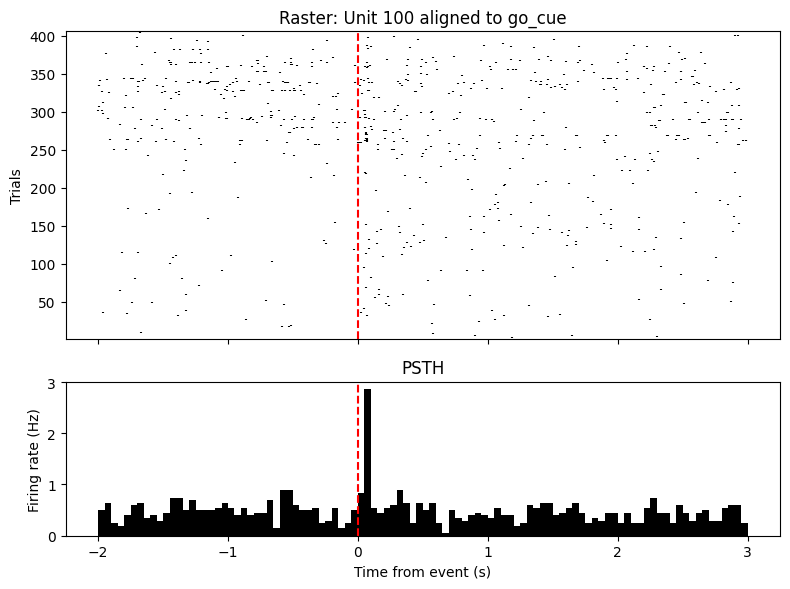

In [8]:
from ephys_behavior import plot_raster_graph
from nwb_utils import NWBUtils
from behavior_utils import extract_fitted_data

session_name='ecephys_764791_2025-01-16_12-50-17_sorted_2025-04-25_14-11-37'
behavior_nwb=NWBUtils.read_behavior_nwb(session_name=session_name)
ephys_nwb=NWBUtils.read_ephys_nwb(session_name=session_name)
fitted_data=extract_fitted_data(nwb_behavior_data=behavior_nwb,session_name=session_name,model_alias='QLearning_L1F1_CK1_softmax',latent_name='q_value_difference')
exclude_trials=
plot_raster_graph(nwb_behavior_data=behavior_nwb,nwb_ephys_data=ephys_nwb,unit_index=100,fitted_data=fitted_data,exclude_trials=exclude_trials)